Customer Purchase behaviour analysis and Loyalty prediction


In [257]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [258]:
#Reading the data
df=pd.read_excel('Electronic.xlsx')

In [259]:
df.head()

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Gender,Region,Product Category,Payment Method,Revenue,Store Rating,Loyalty Score,Membership Status,Preferred Visit Time
0,56,1,29.226195,47.077380,1.000000,1,Male,South,Accessories,UPI,149.252145,3.660461,3.597133,1.0,Evening
1,69,10,420.142612,7.985739,3.760294,1,Female,South,Accessories,Cash,1485.524222,3.551553,25.764903,1.0,Evening
2,46,4,127.742817,37.225718,1.771240,1,Male,East,Laptop,Credit Card,85.550131,3.922839,7.022399,1.0,Morning
3,32,9,417.722683,8.227732,1.926831,0,Female,East,Tablet,UPI,824.118724,3.860422,7.635412,1.0,Afternoon
4,60,13,608.031366,5.000000,3.902927,0,Female,South,Tablet,UPI,2463.590392,3.812820,29.461119,0.0,Morning


Preprocessing

In [260]:
#Shape of dataframe
df.shape

(5000, 15)

In [261]:
#Concise summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   5000 non-null   int64  
 1   Items Purchased       5000 non-null   int64  
 2   Total Spent           5000 non-null   float64
 3   Discount (%)          5000 non-null   float64
 4   Satisfaction Score    5000 non-null   float64
 5   Warranty Extension    5000 non-null   int64  
 6   Gender                4998 non-null   object 
 7   Region                5000 non-null   object 
 8   Product Category      5000 non-null   object 
 9   Payment Method        4996 non-null   object 
 10  Revenue               5000 non-null   float64
 11  Store Rating          4997 non-null   float64
 12  Loyalty Score         5000 non-null   float64
 13  Membership Status     4994 non-null   float64
 14  Preferred Visit Time  4992 non-null   object 
dtypes: float64(7), int64(

In [262]:
#FInding the number of unique values in each column
for i in df.columns:
    print(i,df[i].nunique())

Age 52
Items Purchased 14
Total Spent 5000
Discount (%) 4417
Satisfaction Score 2787
Warranty Extension 2
Gender 3
Region 4
Product Category 5
Payment Method 5
Revenue 5000
Store Rating 4997
Loyalty Score 4962
Membership Status 2
Preferred Visit Time 3


Observation
1) Columns Items Purchased,Warranty Extension,Gender,Region,Product Category,Payment Method,Membership Status,Preferred Visit TIme are of categorical nature.

In [263]:
#Checking for any duplicate rows
df.duplicated().sum()

0

In [264]:
#Checking for any null values
df.isnull().sum()

Age                     0
Items Purchased         0
Total Spent             0
Discount (%)            0
Satisfaction Score      0
Warranty Extension      0
Gender                  2
Region                  0
Product Category        0
Payment Method          4
Revenue                 0
Store Rating            3
Loyalty Score           0
Membership Status       6
Preferred Visit Time    8
dtype: int64

Observation
1) Missing values observed in columns Gender,Payment Method,Store Rating,Membership Status,Preferred Visit Time.
2) Other than Store Rating ,all othe columns with missing values are of categorical nature and can be imputed with mode.
3) Missing values in Store Rating can be imputed with median.

In [265]:
#Handling missing values
df['Store Rating'].fillna(df['Store Rating'].median(),inplace=True)

In [266]:
from sklearn.impute import SimpleImputer
null_columns = df.columns[df.isnull().any()]
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer=imp_mode.fit(df[null_columns])
df_imp=imputer.transform(df[null_columns])
df_imp=pd.DataFrame(df_imp)
df_imp.columns=['Gender','Payment Method','Membership Status','Preferred Visit Time']
df[null_columns]=df_imp[null_columns]


In [267]:
df.isna().sum()

Age                     0
Items Purchased         0
Total Spent             0
Discount (%)            0
Satisfaction Score      0
Warranty Extension      0
Gender                  0
Region                  0
Product Category        0
Payment Method          0
Revenue                 0
Store Rating            0
Loyalty Score           0
Membership Status       0
Preferred Visit Time    0
dtype: int64

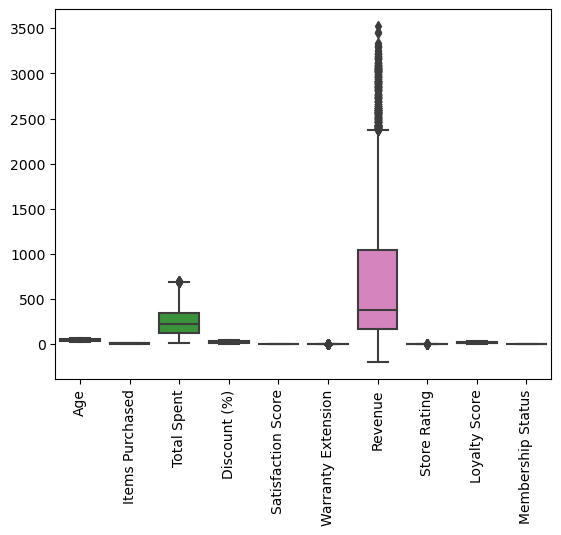

In [268]:
#Checking for outlier using boxplot
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

In [269]:
num_columns=['Age','Total Spent','Discount (%)','Satisfaction Score','Revenue','Store Rating','Loyalty Score']
# Calculate IQR for numerical columns
Q1 = df[num_columns].quantile(0.25)
Q3 = df[num_columns].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((df[num_columns] < lower_bound) | (df[num_columns] > upper_bound)).sum()
print(outliers)

Age                     0
Total Spent            13
Discount (%)            0
Satisfaction Score      0
Revenue               301
Store Rating           14
Loyalty Score           0
dtype: int64


Text(0, 0.5, 'Frequency')

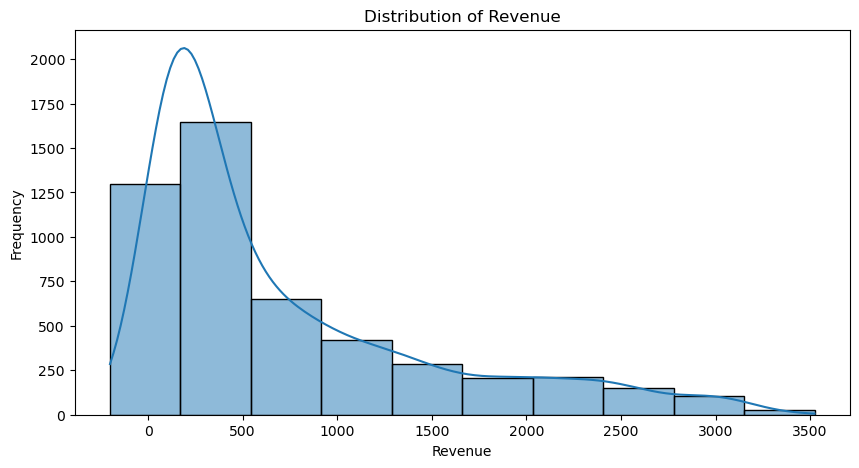

In [270]:
plt.figure(figsize=(10, 5)) 
sns.histplot(df['Revenue'], bins=10, kde=True) 
plt.title('Distribution of Revenue') 
plt.xlabel('Revenue') 
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

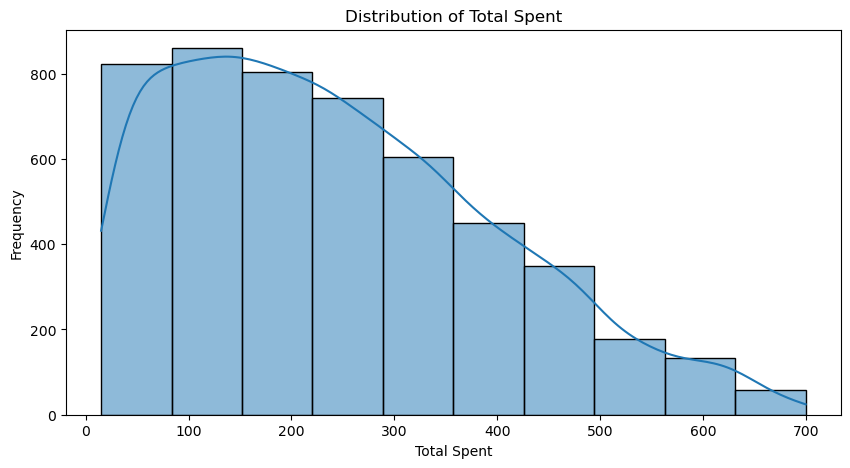

In [271]:
plt.figure(figsize=(10, 5)) 
sns.histplot(df['Total Spent'], bins=10, kde=True) 
plt.title('Distribution of Total Spent') 
plt.xlabel('Total Spent') 
plt.ylabel('Frequency')

C:\Users\Sunitha\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: >

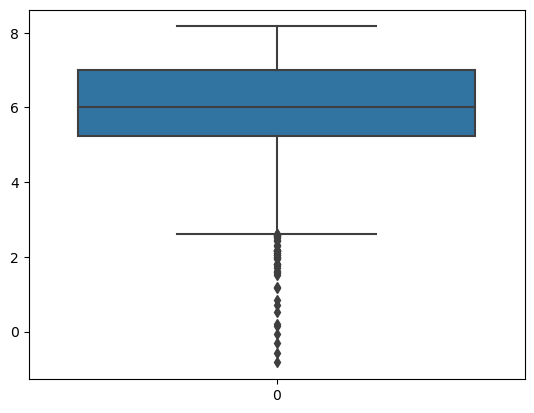

In [272]:
#Applying log transformation on columns revenue and Total Spent
df['Log Revenue'] = np.log(df['Revenue'] + 1) 
sns.boxplot(df['Log Revenue'])


In [273]:
Q1 = df['Log Revenue'].quantile(0.25)
Q3 = df['Log Revenue'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((df['Log Revenue'] < lower_bound) | (df['Log Revenue'] > upper_bound)).sum()
print(outliers)

45


Observation
Even after applying log transformation outliers are present but less in number and outliers can not be removed as it appears to be valid data

Text(0, 0.5, 'Frequency')

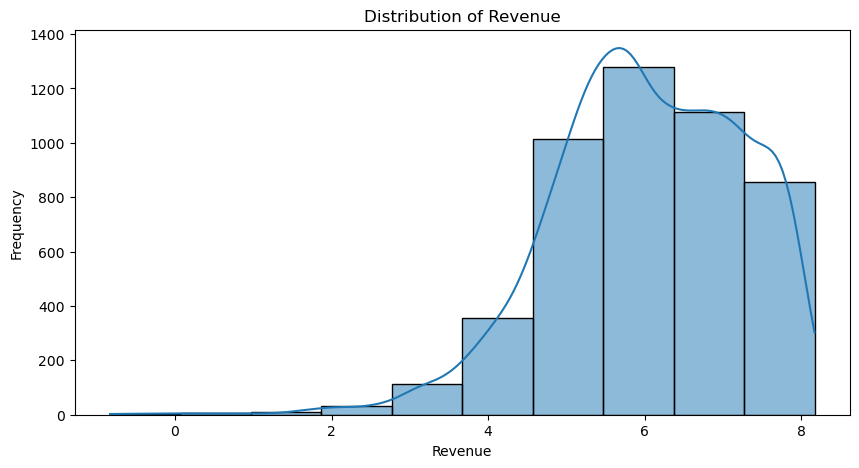

In [274]:
plt.figure(figsize=(10, 5)) 
sns.histplot(df['Log Revenue'], bins=10, kde=True) 
plt.title('Distribution of Revenue') 
plt.xlabel('Revenue') 
plt.ylabel('Frequency')

In [275]:
#Binning on Satisfaction Score and Loyalty scrore for better understanding of data
bins=[1,2,3,4,5]
labels=['Poor','Average','Good','Excellent']
df['SS']=pd.cut(df['Satisfaction Score'],bins=bins,labels=labels,include_lowest=True,right=True)
bins_1=[0,10,20,30,40]
labels_1=['Poor','Average','Good','Excellent']
df['Loyal']=pd.cut(df['Loyalty Score'],bins=bins_1,labels=labels_1,include_lowest=True,right=True)

In [276]:
df['SS'].value_counts()

Poor         2222
Excellent    1319
Average       770
Good          689
Name: SS, dtype: int64

In [277]:
df['Loyal'].value_counts()

Poor         1766
Average      1554
Good         1300
Excellent     380
Name: Loyal, dtype: int64

In [278]:
numeric_cols = df.select_dtypes(include=['number'])
object_cols = df.select_dtypes(include=['object']) 

In [279]:
numeric_cols.describe()

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Revenue,Store Rating,Loyalty Score,Log Revenue
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4783.000000
mean,43.584600,7.536600,243.721837,26.622330,2.650108,0.220400,717.998214,3.975181,15.638275,6.022769
std,14.919094,4.014858,154.949018,13.586725,1.533394,0.414558,776.789137,0.250616,9.144742,1.228837
min,18.000000,1.000000,15.105730,5.000000,1.000000,0.000000,-201.427094,3.076092,0.000000,-0.828023
25%,31.000000,4.000000,119.130074,15.382663,1.000000,0.000000,164.697614,3.799819,7.944790,5.235595
50%,43.000000,7.000000,221.514206,27.848579,2.338884,0.000000,380.548500,3.969738,13.969791,6.024873
75%,56.000000,11.000000,346.173367,38.086993,4.129317,0.000000,1047.426498,4.149890,23.521601,6.989942
max,69.000000,14.000000,699.611576,48.489427,5.000000,1.000000,3523.469177,4.764298,39.235392,8.167485


In [280]:
object_cols.describe(include=['object'])

,Gender,Region,Product Category,Payment Method,Membership Status,Preferred Visit Time
count,5000,5000,5000,5000,5000.0,5000
unique,3,4,5,5,2.0,3
top,Male,South,Accessories,Net Banking,0.0,Morning
freq,2448,1310,1015,1042,3460.0,1680


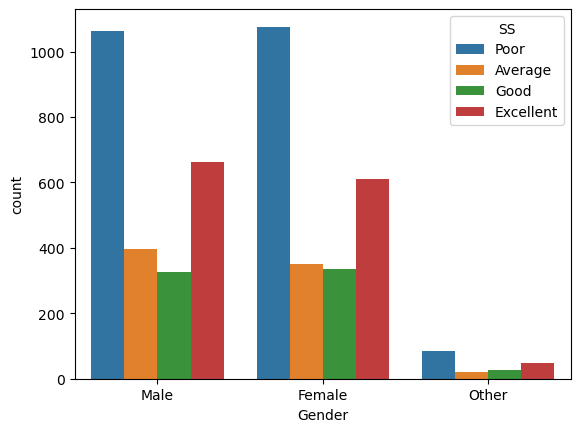

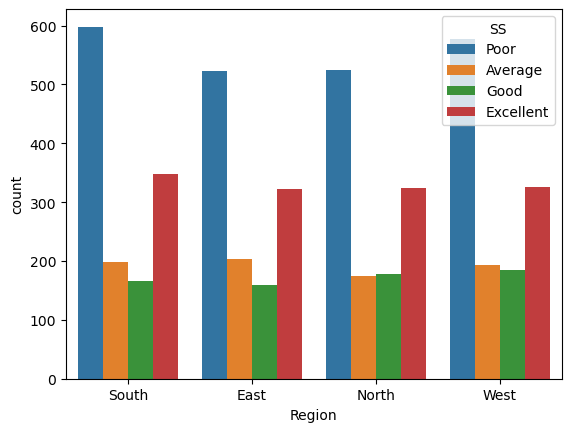

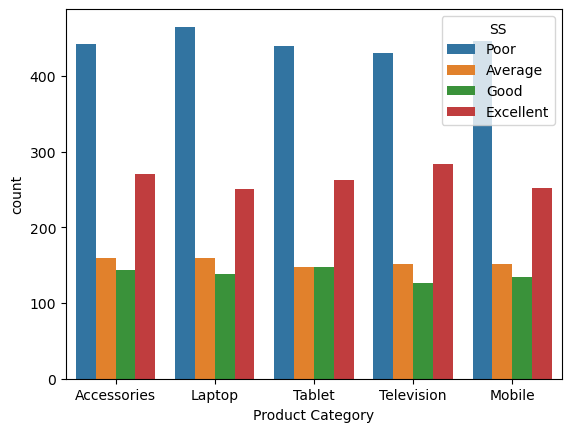

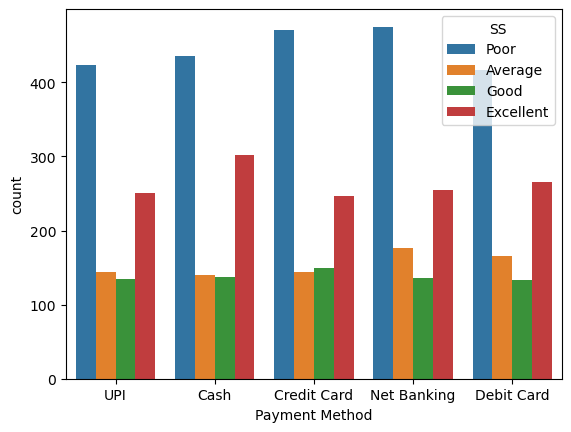

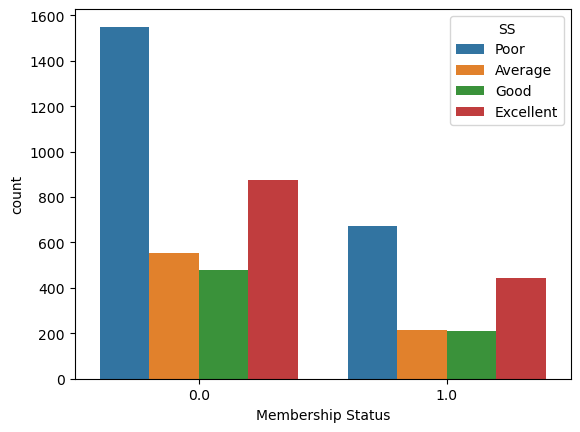

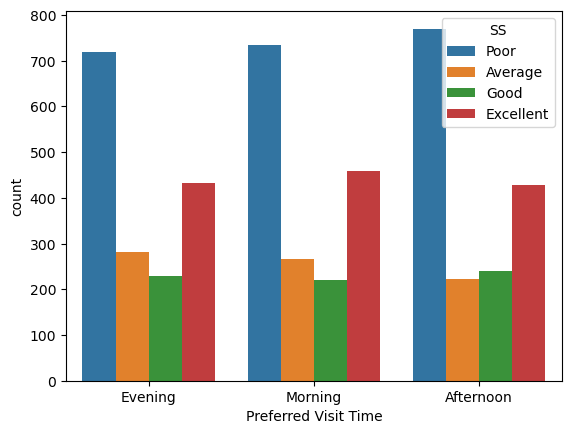

In [281]:
#Univariate analysis 
for i in object_cols:
    sns.countplot(data=df,x=i,hue='SS')
    plt.show()

<Axes: xlabel='Loyalty Score_r', ylabel='Satisfaction Score_r'>

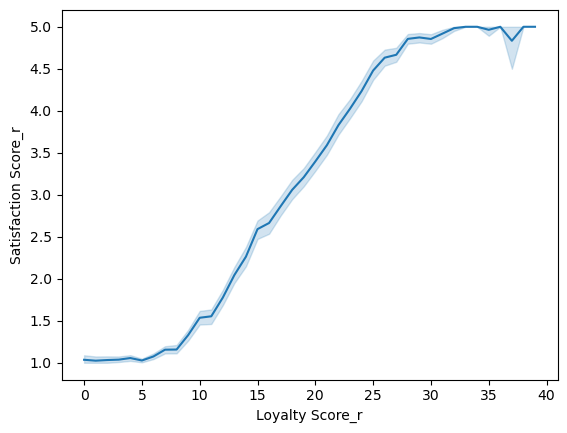

In [282]:
df['Satisfaction Score_r']=df['Satisfaction Score'].round()
df['Loyalty Score_r']=df['Loyalty Score'].round()
sns.lineplot(data=df,y='Satisfaction Score_r',x='Loyalty Score_r',)

Observation:
1) Plot suggest a positive correlation between Loyalty Score and Satisfaction Score
2) For loyalty score between 0 and 10,Satisfaction Score is stable around 1
3) After that a noticable upward trend in Satisfaction Score
4) There is a slight dip in Satisfaction Score around Loyalty Score of 37.This may be due to outliers 
5) Business may focus on customer with medium to high loyalty score to increase Satisfaction Score

In [283]:
df.drop(['Satisfaction Score_r','Loyalty Score_r'],inplace=True,axis=1)


In [284]:
numeric_cols.corr()

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Revenue,Store Rating,Loyalty Score,Log Revenue
Age,1.000000,-0.005522,-0.003212,0.000439,0.000331,-0.034065,-0.006344,-0.023019,0.009317,-0.001285
Items Purchased,-0.005522,1.000000,0.836032,-0.853837,0.494572,0.064381,0.674361,0.017553,0.557782,0.699384
Total Spent,-0.003212,0.836032,1.000000,-0.979015,0.597239,0.121439,0.882421,0.013542,0.669716,0.818788
Discount (%),0.000439,-0.853837,-0.979015,1.000000,-0.589436,-0.086038,-0.829426,-0.013676,-0.659179,-0.825069
Satisfaction Score,0.000331,0.494572,0.597239,-0.589436,1.000000,0.062950,0.786229,0.010488,0.935086,0.766259
Warranty Extension,-0.034065,0.064381,0.121439,-0.086038,0.062950,1.000000,0.130036,0.016704,0.076038,0.085098
Revenue,-0.006344,0.674361,0.882421,-0.829426,0.786229,0.130036,1.000000,0.010908,0.808505,0.844336
Store Rating,-0.023019,0.017553,0.013542,-0.013676,0.010488,0.016704,0.010908,1.000000,0.007266,0.008701
Loyalty Score,0.009317,0.557782,0.669716,-0.659179,0.935086,0.076038,0.808505,0.007266,1.000000,0.780178
Log Revenue,-0.001285,0.699384,0.818788,-0.825069,0.766259,0.085098,0.844336,0.008701,0.780178,1.000000


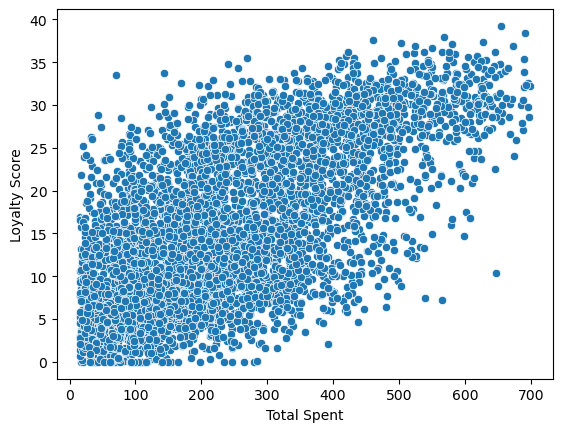

In [285]:
sns.scatterplot(x='Total Spent',y='Loyalty Score',data=df)
plt.show()

Observation
1) As the value of Total Spent increase,Loyalty score also increase showing a positive correlation.
2) There is a noticable spread in data points indicating varaibility in relaionship.
3) Though there is a general trend,individual data point can deviate.It indicates other factors also influence loyalty score

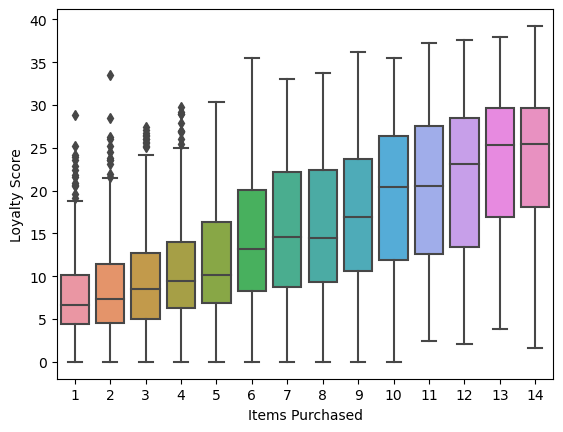

In [286]:
sns.boxplot(x='Items Purchased',y='Loyalty Score',data=df)
plt.show()

Observation:
1) As the number of othems purchased increase,loyalty score also tends to increase showing a positive correlation.
2) For lower number of items purchased,loyalty score is widely spread ranging from 0 to 35.
3) As the number of items purchased is more than 4,loyalty score is clusterd around high loyalty score.
4) This suggest customers who buy more tend to have good loyalty score.
5) Business must focus on startegies that encourages customers to purchase more items.



In [287]:
df.corr()['Discount (%)']

C:\Users\Sunitha\AppData\Local\Temp\ipykernel_6344\1422112945.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Discount (%)']


Age                   0.000439
Items Purchased      -0.853837
Total Spent          -0.979015
Discount (%)          1.000000
Satisfaction Score   -0.589436
Warranty Extension   -0.086038
Revenue              -0.829426
Store Rating         -0.013676
Loyalty Score        -0.659179
Log Revenue          -0.825069
Name: Discount (%), dtype: float64

Observation:
1) High negative  correlation between items purchased and discount implies discount are being offered to fewer items or customers are not buying in bulk even after offering discount.
2) Higher discounts are strongly associated with lower total spending and revenue suggesting discounts not effectively driving overall sales.
3) Noticable negative impact of higher discounts on Satsfaction Score and Loyalty Score,indicating giving large discounts is not the best strategy.
4) Customer may be considering high discount items as low in quality or less desirable item.
5) Discounts have little impact on features Warranty extension,Store rating and membership status.

<Axes: xlabel='Product Category', ylabel='Discount (%)'>

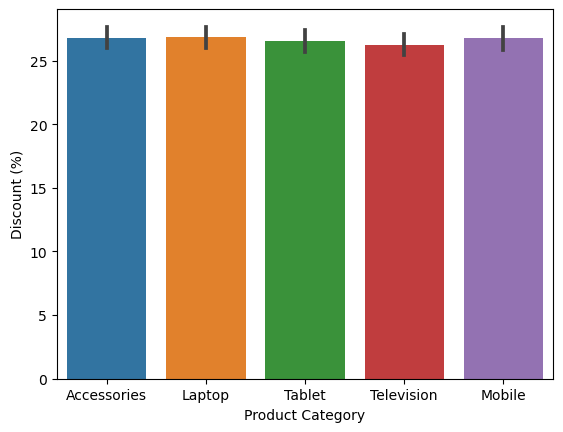

In [288]:
sns.barplot(x='Product Category',y='Discount (%)',data=df)

Observation 
All product categories are receiving a uniform discount percentage

<Axes: xlabel='Warranty Extension', ylabel='count'>

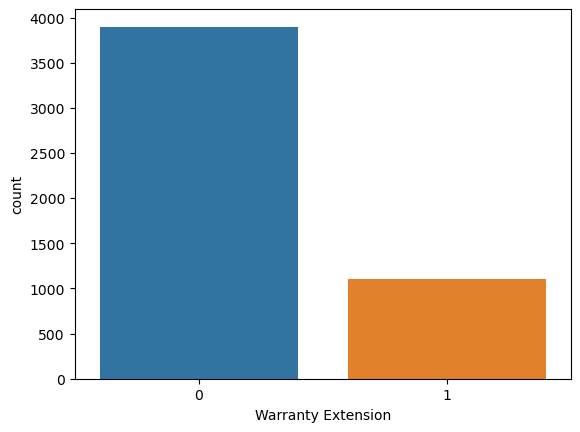

In [289]:
sns.countplot(data=df,x='Warranty Extension')

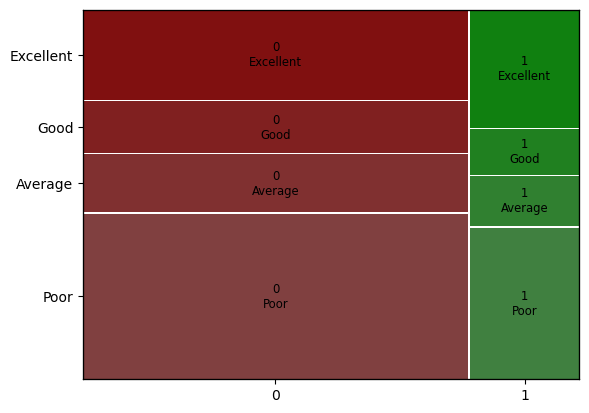

In [290]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(df, ['Warranty Extension', 'SS']) 
plt.show()


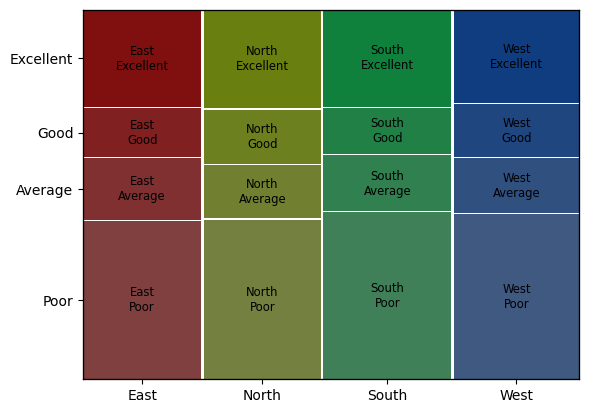

In [291]:
mosaic(df, ['Region', 'SS']) 
plt.show()

Observation:
1) Poor satisfaction is dominant across all regions
2) There is a considerable amount of highly satisfied customers also.
3) The average and Good categories are less in number across all regions

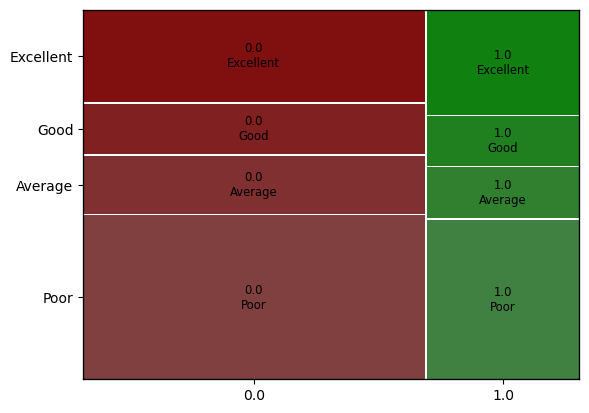

In [292]:
mosaic(df, ['Membership Status', 'SS']) 
plt.show()

<Axes: xlabel='Preferred Visit Time', ylabel='count'>

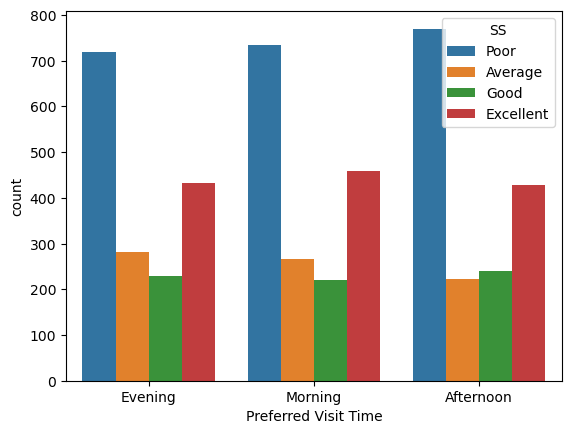

In [293]:
#plt.bar(df['Preferred Visit Time'],counts,color=['blue', 'orange', 'green'])
sns.countplot(data=df,x='Preferred Visit Time',hue='SS')

In [294]:
contingency_table=pd.crosstab(df['SS'],df['Warranty Extension'])
contingency_table

Warranty Extension,0,1
SS,,
Poor,1765,457
Average,618,152
Good,552,137
Excellent,963,356


In [295]:
contingency_table=pd.crosstab(df['SS'],df['Preferred Visit Time'])
contingency_table

Preferred Visit Time,Afternoon,Evening,Morning
SS,,,
Poor,770,718,734
Average,222,281,267
Good,240,228,221
Excellent,428,433,458


In [296]:
contingency_table=pd.crosstab(df['SS'],df['Gender'])
contingency_table

Gender,Female,Male,Other
SS,,,
Poor,1076,1062,84
Average,350,398,22
Good,335,326,28
Excellent,610,662,47


In [297]:
contingency_table=pd.crosstab(df['Gender'],df['Product Category'])
contingency_table

Product Category,Accessories,Laptop,Mobile,Tablet,Television
Gender,,,,,
Female,471,495,453,474,478
Male,510,481,493,485,479
Other,34,37,38,38,34


In [298]:
contingency_table=pd.crosstab(df['Region'],df['Product Category'])
contingency_table

Product Category,Accessories,Laptop,Mobile,Tablet,Television
Region,,,,,
East,254,221,233,269,231
North,230,256,234,217,264
South,269,258,292,237,254
West,262,278,225,274,242


In [299]:
contingency_table=pd.crosstab(df['Region'],df['SS'])
contingency_table

SS,Poor,Average,Good,Excellent
Region,,,,
East,523,203,160,322
North,524,175,178,324
South,598,199,166,347
West,577,193,185,326


In [300]:
print(df['Membership Status'].value_counts(normalize=True))
contingency_table=pd.crosstab(df['SS'],df['Membership Status'])
contingency_table

0.0    0.692
1.0    0.308
Name: Membership Status, dtype: float64


Membership Status,0.0,1.0
SS,,
Poor,1550,672
Average,554,216
Good,479,210
Excellent,877,442


C:\Users\Sunitha\AppData\Local\Temp\ipykernel_6344\2537347174.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Satisfaction Score'])


<Axes: xlabel='Satisfaction Score', ylabel='Density'>

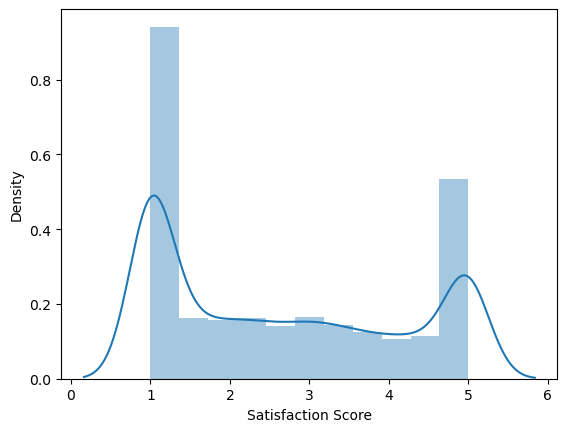

In [301]:
sns.distplot(df['Satisfaction Score'])

C:\Users\Sunitha\AppData\Local\Temp\ipykernel_6344\3706292073.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Loyalty Score'])


<Axes: xlabel='Loyalty Score', ylabel='Density'>

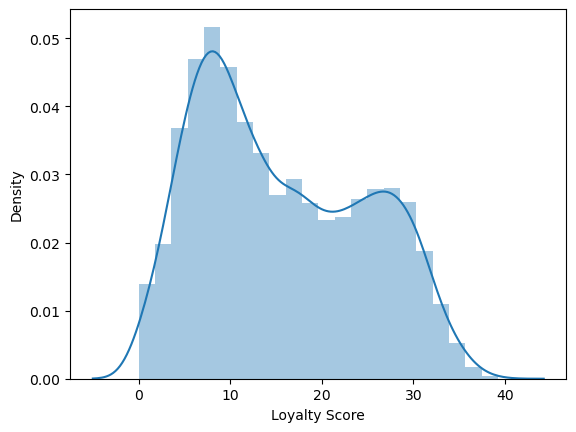

In [302]:
sns.distplot(df['Loyalty Score'])

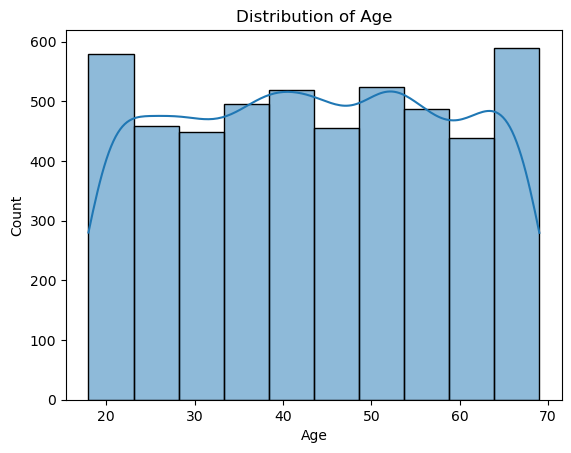

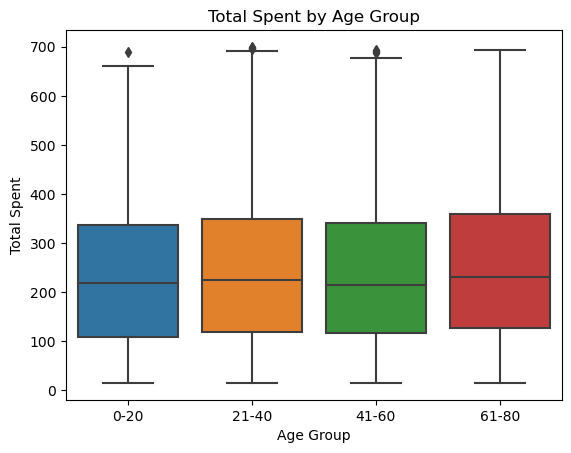

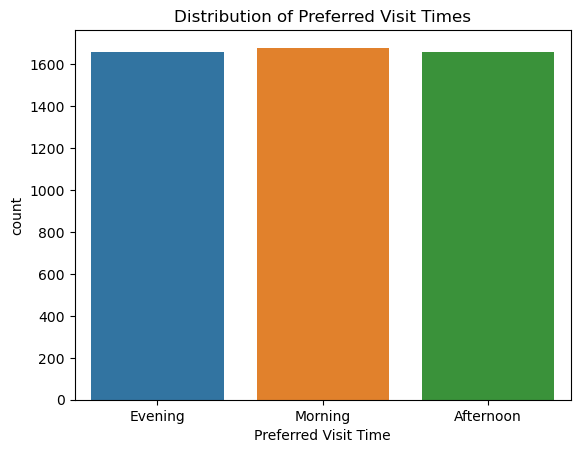

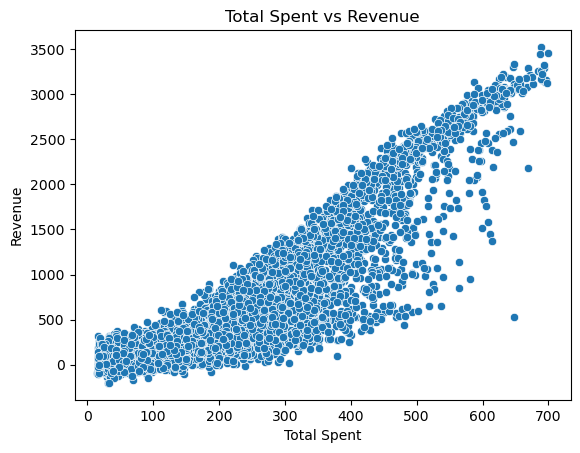

C:\Users\Sunitha\AppData\Local\Temp\ipykernel_6344\3607137542.py:27: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


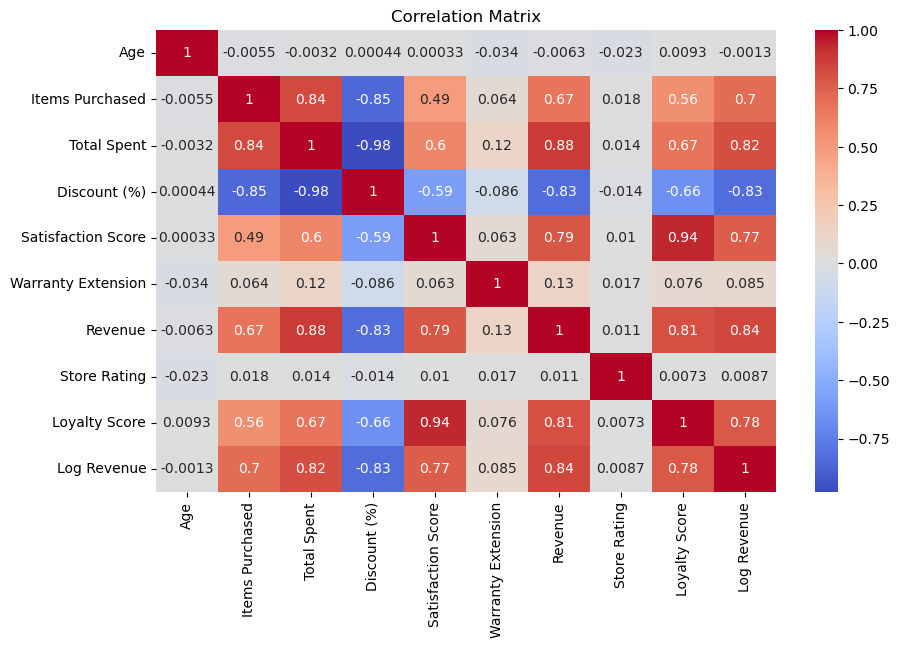

In [303]:
# Binning Age 
bins = [0, 20, 40, 60, 80] 
labels = ['0-20', '21-40', '41-60', '61-80'] 
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
# Histogram
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Distribution of Age')
plt.show()

# Box plot
sns.boxplot(x='Age Group', y='Total Spent', data=df)
plt.title('Total Spent by Age Group')
plt.show()

# Bar chart for categorical variables
sns.countplot(x='Preferred Visit Time', data=df)
plt.title('Distribution of Preferred Visit Times')
plt.show()

# Scatter plot
sns.scatterplot(x='Total Spent', y='Revenue', data=df)
plt.title('Total Spent vs Revenue')
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [310]:
grouped =df.groupby(['Product Category','Region']).agg({'Total Spent':'mean','Items Purchased':'mean','Revenue':'mean','Satisfaction Score':'mean' }).reset_index()
grouped.head()

,Product Category,Region,Total Spent,Items Purchased,Revenue,Satisfaction Score
0,Accessories,East,0.024870,0.053648,0.061039,2.749485
1,Accessories,North,0.063643,0.099187,0.049509,2.684178
2,Accessories,South,-0.057776,-0.017914,-0.018776,2.637187
3,Accessories,West,-0.038259,0.047929,-0.048884,2.602796
4,Laptop,East,-0.033004,-0.031096,-0.063032,2.715963


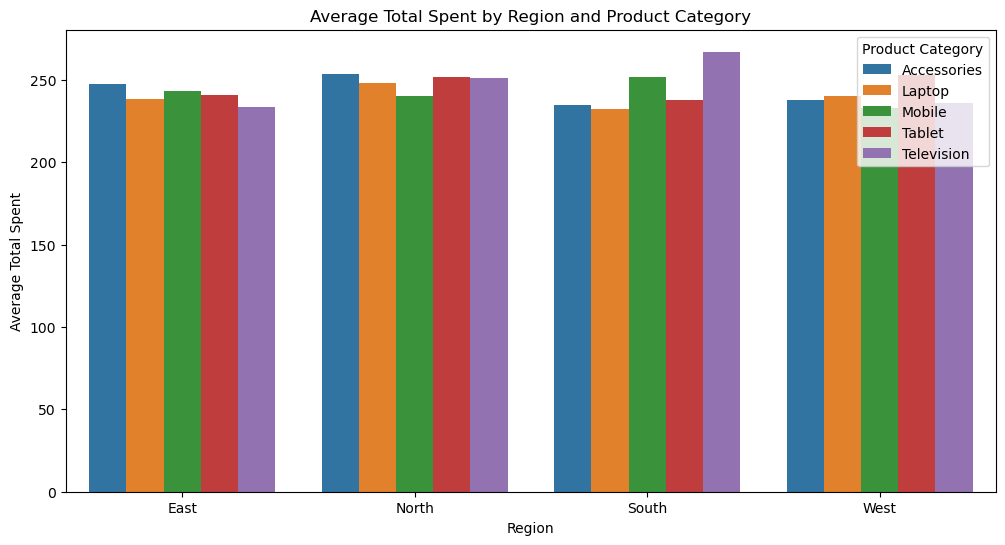

In [305]:
plt.figure(figsize=(12, 6)) 
sns.barplot(data=grouped,x='Region',y='Total Spent',hue='Product Category')
plt.title('Average Total Spent by Region and Product Category') 
plt.ylabel('Average Total Spent') 
plt.xlabel('Region')
plt.legend(title='Product Category')
plt.show()

In [306]:
#Scaling
cat_columns=['Age','Items Purchased','Total Spent','Discount (%)','Revenue','Store Rating','Loyalty Score','Log Revenue']
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df[cat_columns]=sc.fit_transform(df[cat_columns])
df.head()

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Gender,Region,Product Category,Payment Method,Revenue,Store Rating,Loyalty Score,Membership Status,Preferred Visit Time,Log Revenue,SS,Loyal,Age Group
0,0.832265,-1.628265,-1.384437,1.505668,1.000000,1,Male,South,Accessories,UPI,-0.732249,-1.255912,-1.316860,1.0,Evening,-0.822371,Poor,Poor,41-60
1,1.703719,0.613632,1.138687,-1.371814,3.760294,1,Female,South,Accessories,Cash,0.988174,-1.690516,1.107482,1.0,Evening,1.042905,Good,Good,61-80
2,0.161916,-0.880966,-0.748573,0.780501,1.771240,1,Male,East,Laptop,Credit Card,-0.814264,-0.208872,-0.942261,1.0,Morning,-1.271290,Poor,Poor,41-60
3,-0.776573,0.364533,1.123068,-1.354001,1.926831,0,Female,East,Tablet,UPI,0.136628,-0.457954,-0.875220,1.0,Afternoon,0.563810,Poor,Poor,21-40
4,1.100405,1.360931,2.351393,-1.591590,3.902927,0,Female,South,Tablet,UPI,2.247414,-0.647912,1.511713,0.0,Morning,1.454382,Good,Good,41-60


In [307]:
#Encoding
from sklearn.preprocessing import OneHotEncoder

# Select the categorical columns
categorical_columns = ['Gender','Region','Product Category','Payment Method','Membership Status','Preferred Visit Time'] 

# Instantiate the OneHotEncoder
encoder = OneHotEncoder()

# Perform one-hot encoding on the selected columns of the DataFrame
encoded_data = encoder.fit_transform(df[categorical_columns])

# Convert the encoded data to a DataFrame with appropriate column names
encoded_columns = encoder.get_feature_names_out(categorical_columns)
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoded_columns) # Convert to dense array

# Concatenate the encoded columns with the original dataset (dropping the original categorical columns)
df_encoded = pd.concat([df.drop(columns=categorical_columns), encoded_df], axis=1)

# Show the first few rows of the transformed dataset
df_encoded.head()

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Revenue,Store Rating,Loyalty Score,Log Revenue,...,Payment Method_Cash,Payment Method_Credit Card,Payment Method_Debit Card,Payment Method_Net Banking,Payment Method_UPI,Membership Status_0.0,Membership Status_1.0,Preferred Visit Time_Afternoon,Preferred Visit Time_Evening,Preferred Visit Time_Morning
0,0.832265,-1.628265,-1.384437,1.505668,1.000000,1,-0.732249,-1.255912,-1.316860,-0.822371,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.703719,0.613632,1.138687,-1.371814,3.760294,1,0.988174,-1.690516,1.107482,1.042905,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.161916,-0.880966,-0.748573,0.780501,1.771240,1,-0.814264,-0.208872,-0.942261,-1.271290,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.776573,0.364533,1.123068,-1.354001,1.926831,0,0.136628,-0.457954,-0.875220,0.563810,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,1.100405,1.360931,2.351393,-1.591590,3.902927,0,2.247414,-0.647912,1.511713,1.454382,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [308]:
df_encoded.shape

(5000, 35)